In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde
import scipy
from itertools import combinations, product
from tqdm import tqdm
import scipy.stats
import pickle
import os
import statannot
plt.rcParams['figure.figsize'] = [10,10]

In [2]:
channels={1:'OVA',2:'CTDR'}

In [3]:
l_samples=[]
r_samples=[]
for filename in os.listdir('..//240417_alum_flt3_control_more//statistics'):
    if filename[5]=='l':
        l_samples.append(filename)
    elif filename[5]=='r':
        r_samples.append(filename)
    else:
        raise('unknown condition')

In [4]:
df_lst=[]
for sample in l_samples:
    df=assign_channels(read_stats('..//240417_alum_flt3_control_more//statistics//'+sample),channels)
    df['image']=sample
    df['condition']='l'
    df_lst.append(df)
data_df_l=pd.concat(df_lst)
df_lst=[]
for sample in r_samples:
    df=assign_channels(read_stats('..//240417_alum_flt3_control_more//statistics//'+sample),channels)
    df['image']=sample
    df['condition']='r'
    df_lst.append(df)
data_df_r=pd.concat(df_lst)

In [5]:
df_lst=[]
for sample in l_samples:
    df=assign_channels(read_stats('..//240417_alum_flt3_control_more//statistics//'+sample),channels)
    df['image']=sample
    df['condition']='with Flt3 Ligand'
    df_lst.append(df)
for sample in r_samples:
    df=assign_channels(read_stats('..//240417_alum_flt3_control_more//statistics//'+sample),channels)
    df['image']=sample
    df['condition']='without Flt3 Ligand'
    df_lst.append(df)
data_df_all=pd.concat(df_lst)

In [6]:
data_df_all['log_MFI_OVA']=np.log10(data_df_all['Intensity_Mean_OVA']+1e-4)

with Flt3 Ligand v.s. without Flt3 Ligand: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.644e-05 U_stat=1.399e+05


[Text(0.5, 80.7222222222222, ''),
 Text(89.22222222222221, 0.5, 'log mean Alexa Fluor 555 fluorescence')]

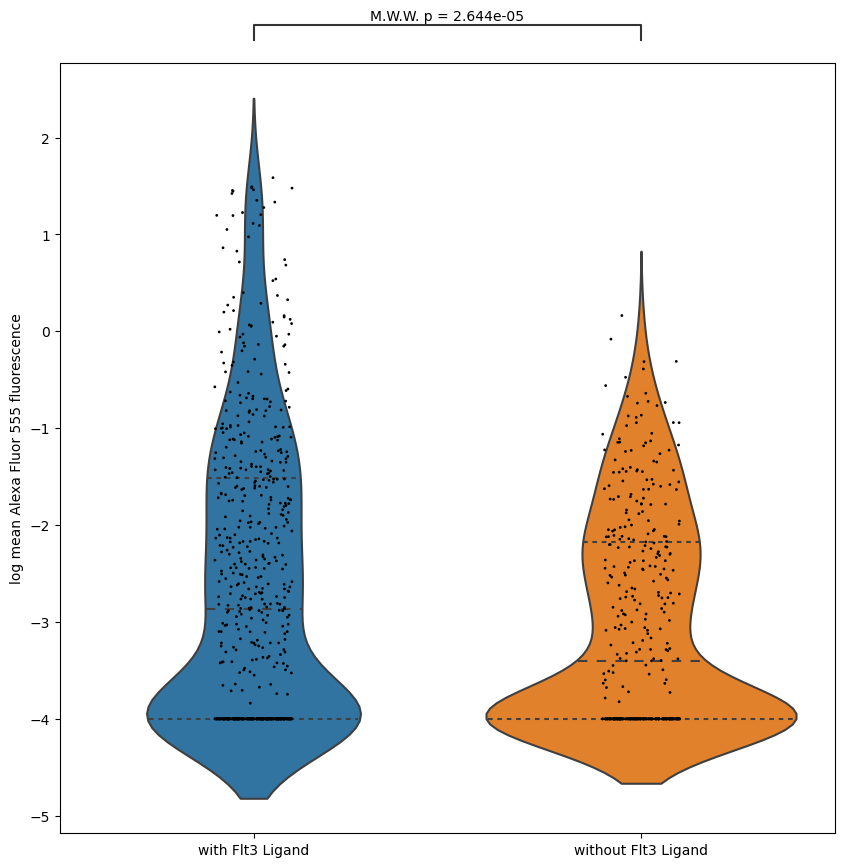

In [7]:
ax=sns.violinplot(data=data_df_all,x='condition',y='log_MFI_OVA',inner='quart')
sns.stripplot(data=data_df_all,x='condition',y='log_MFI_OVA',jitter=True,color='black',s=2)
test_results = statannot.add_stat_annotation(ax, data=data_df_all, x='condition', y='log_MFI_OVA',
                                    box_pairs=[('with Flt3 Ligand','without Flt3 Ligand')],
                                   test='Mann-Whitney', text_format='full',
                                   loc='outside', verbose=2)
ax.set(xlabel='',ylabel='log mean Alexa Fluor 555 fluorescence')

In [13]:
for name,group in data_df_all.groupby('condition'):
    print(np.sum(np.int8(group['Intensity_Mean_OVA']>1))/len(group))

0.06814580031695722
0.0025974025974025974


Text(0, 0.5, 'log mean Alexa Fluor 555 fluorescence')

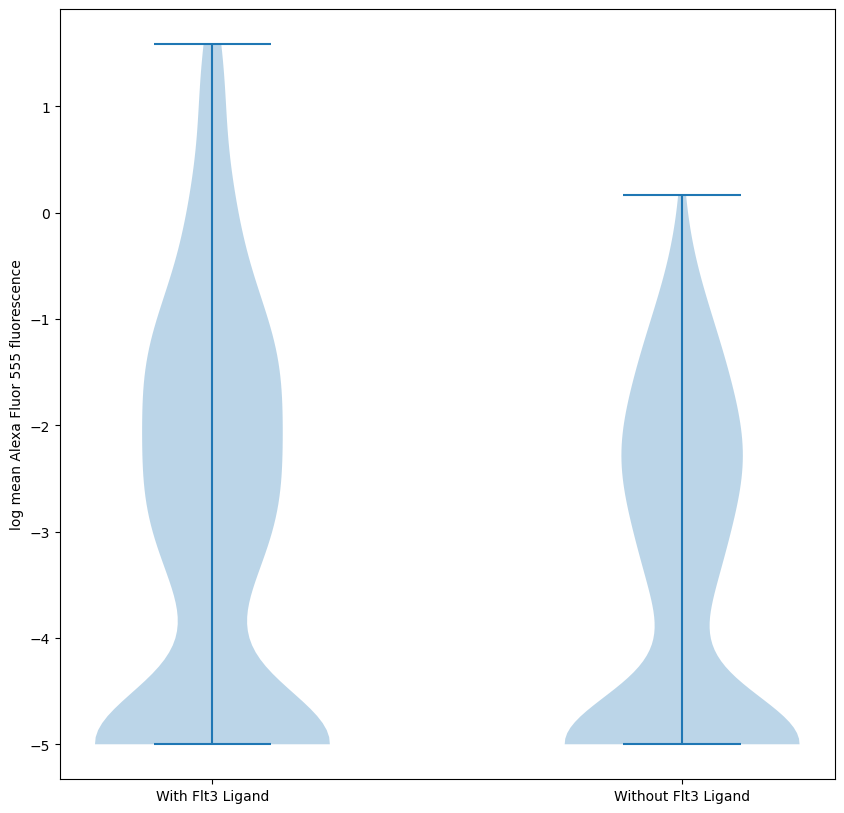

In [26]:
plt.violinplot((np.log10(data_df_l['Intensity_Mean_OVA']+1e-5),np.log10(data_df_r['Intensity_Mean_OVA']+1e-5)))
plt.xticks([1,2],['With Flt3 Ligand','Without Flt3 Ligand'])
plt.ylabel('log mean Alexa Fluor 555 fluorescence')